### Data MIning
### Decision Trees using  scikit-learn and h2o
#### Edgar Acuna
### November 2018

In [1]:
import h2o
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import graphviz
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\edgar2~1\appdata\local\temp\tmpdsylm4
  JVM stdout: c:\users\edgar2~1\appdata\local\temp\tmpdsylm4\h2o_edgar2017_started_from_python.out
  JVM stderr: c:\users\edgar2~1\appdata\local\temp\tmpdsylm4\h2o_edgar2017_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.9
H2O cluster version age:,5 months and 26 days !!!
H2O cluster name:,H2O_from_python_edgar2017_vsqu16
H2O cluster total nodes:,1
H2O cluster free memory:,1.755 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


### I Decision Trees para Diabetes usando scikit learn

In [2]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
modeltree = tree.DecisionTreeClassifier(max_depth=3)
modeltree = modeltree.fit(X,y)

In [3]:
# Tasa de precision
modeltree.score(X, y)

0.7760416666666666

Estimating the accuracy using cross validation

In [4]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeltree, X, y, cv=10)
scores
#Hallando la precision media y un intervalo de confianza 
print("CV Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.732 (+/- 0.078)


In [5]:
predictions = modeltree.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       500
           1       0.70      0.64      0.67       268

   micro avg       0.78      0.78      0.78       768
   macro avg       0.75      0.74      0.75       768
weighted avg       0.77      0.78      0.77       768



In [6]:
dot_data = tree.export_graphviz(modeltree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Diabetes") 

'Diabetes.pdf'

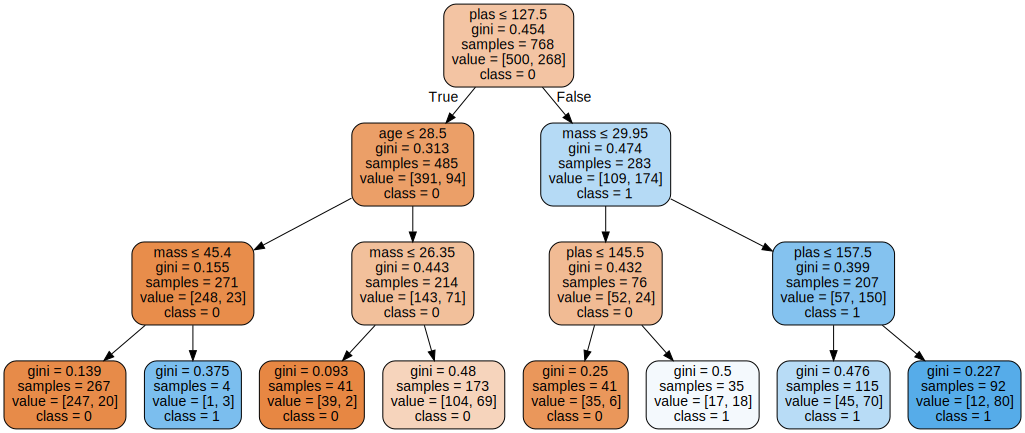

In [7]:
clases=['0','1']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names[0:8],  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Parameters to control the size of the tree

In [8]:
modeltree1 = tree.DecisionTreeClassifier(min_samples_leaf=40)
modeltree1 = modeltree1.fit(X,y)
# Tasa de precision
modeltree1.score(X, y)

0.7955729166666666

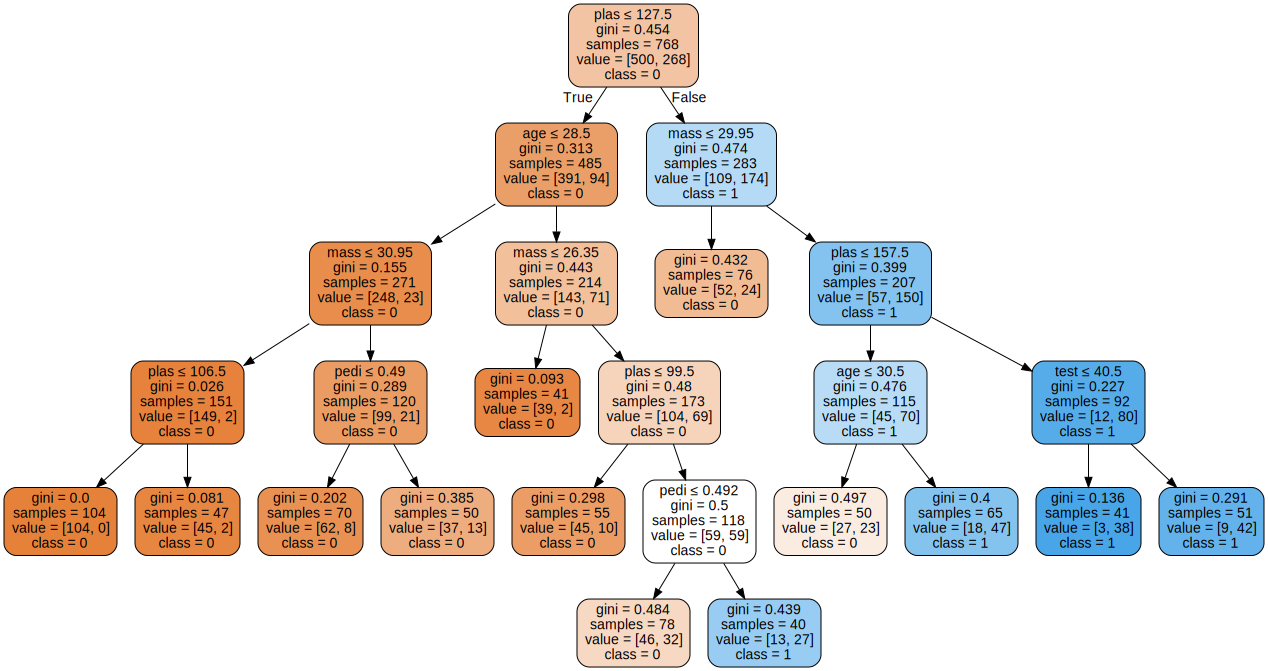

In [9]:
clases=['0','1']
dot_data = tree.export_graphviz(modeltree1, out_file=None, 
                         feature_names=names[0:8],  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph1= graphviz.Source(dot_data)  
graph1 

In [10]:
modeltree2 = tree.DecisionTreeClassifier(min_samples_split=100)
modeltree2 = modeltree2.fit(X,y)
# Tasa de precision
modeltree2.score(X, y)

0.8020833333333334

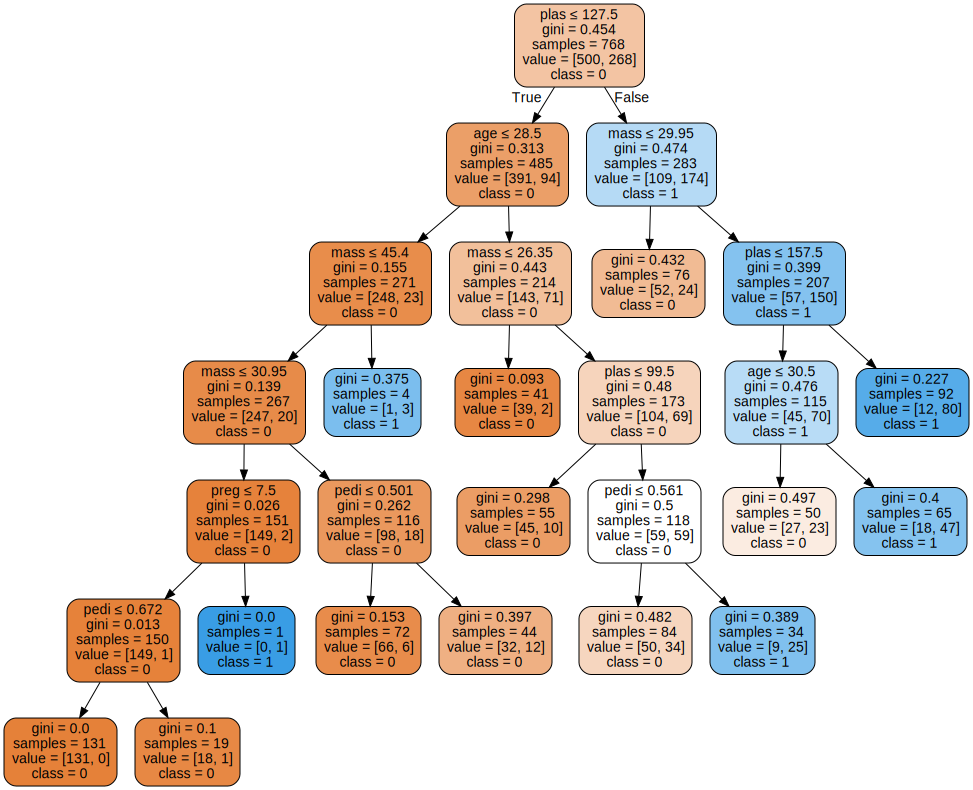

In [11]:
clases=['0','1']
dot_data = tree.export_graphviz(modeltree2, out_file=None, 
                         feature_names=names[0:8],  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph2= graphviz.Source(dot_data)  
graph2 

In [12]:
modeltree3 = tree.DecisionTreeClassifier(max_leaf_nodes=5)
modeltree3 = modeltree3.fit(X,y)
# Tasa de precision
modeltree3.score(X, y)

0.7721354166666666

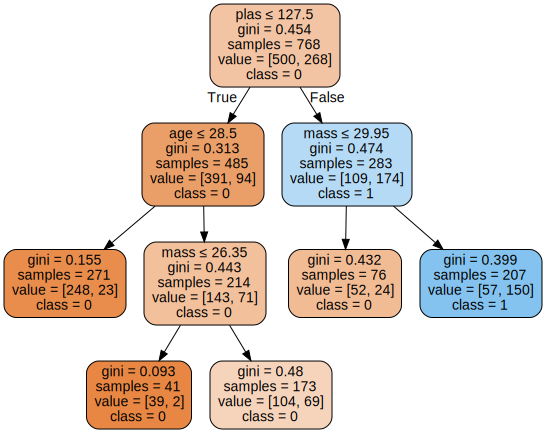

In [13]:
clases=['0','1']
dot_data = tree.export_graphviz(modeltree3, out_file=None, 
                         feature_names=names[0:8],  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph3= graphviz.Source(dot_data)  
graph3 

In [14]:
modeltree4 = tree.DecisionTreeClassifier(min_impurity_decrease=.001)
modeltree4 = modeltree4.fit(X,y)
# Tasa de precision
modeltree4.score(X, y)

0.98046875

Estimating the accuracy by cross validation

In [15]:
scores = cross_val_score(modeltree4, X, y, cv=10)
scores
#Hallando la precision media y un intervalo de confianza 
print("CV Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.713 (+/- 0.133)


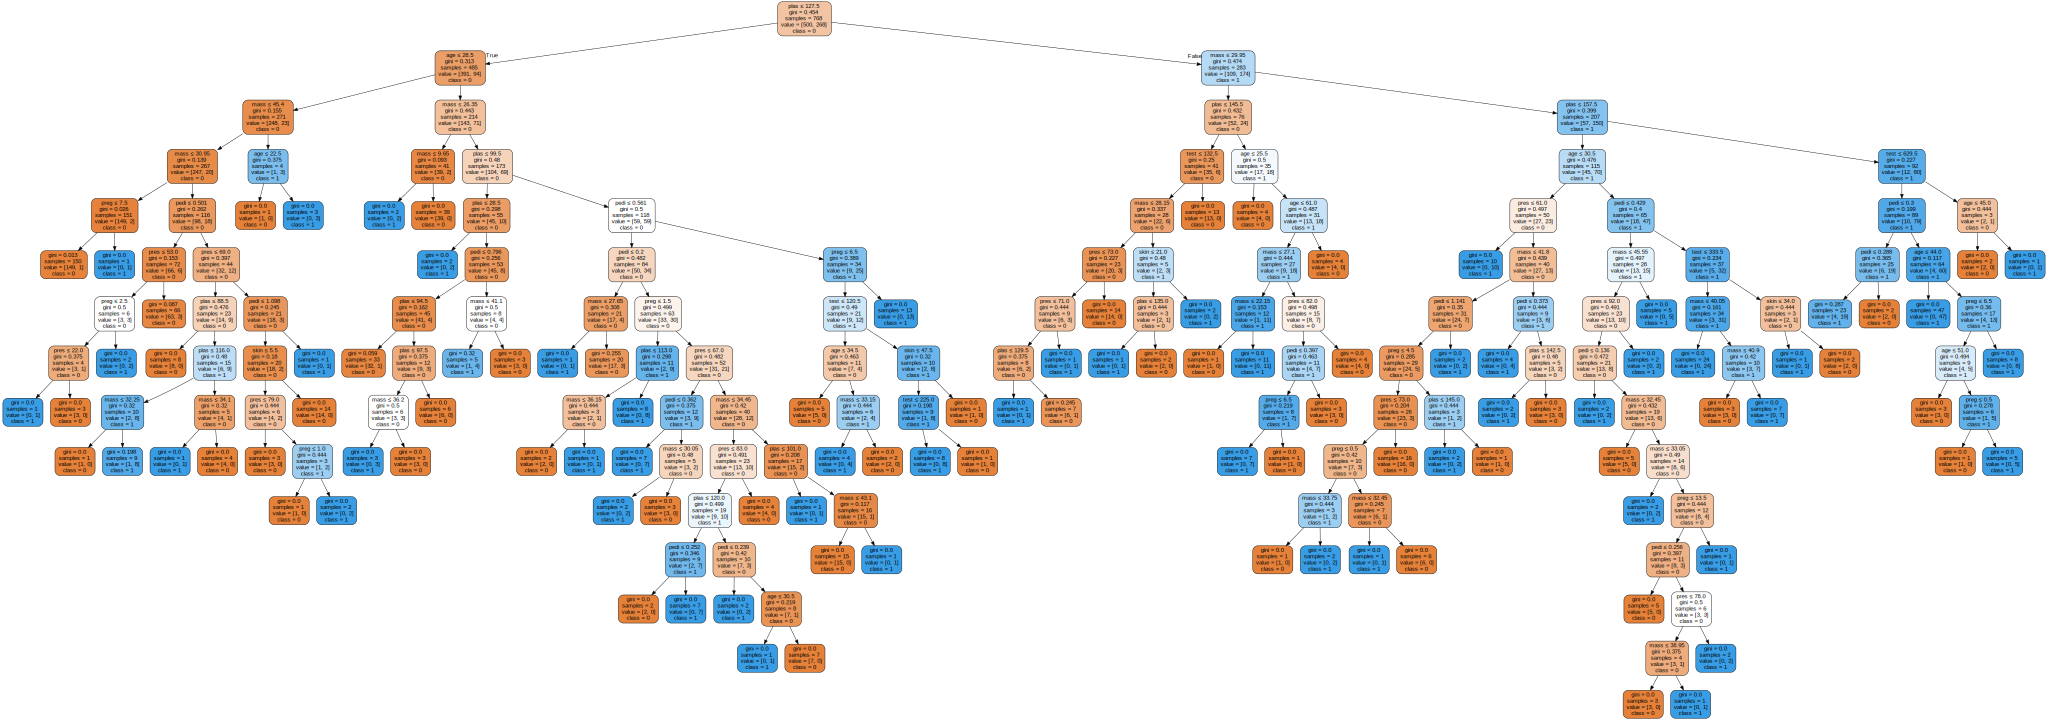

In [16]:
clases=['0','1']
dot_data = tree.export_graphviz(modeltree4, out_file=None, 
                         feature_names=names[0:8],  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph4= graphviz.Source(dot_data)  
graph4

### II- Applying Decision Trees  to  Diabetes using RandomForest of H20. Decision tree is a random forest with only one tree,  n=1.

In [17]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=1,mtries=8,max_depth=3,sample_rate=1)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))
model.model_performance(diabetes)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
0.776041666667

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.148642337278
RMSE: 0.385541615494
LogLoss: 0.458514115494
Mean Per-Class Error: 0.226701492537
AUC: 0.835679104478
Gini: 0.671358208955
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.412903249264: 


,1,2,Error,Rate
1,333.0,167.0,0.334,(167.0/500.0)
2,32.0,236.0,0.1194,(32.0/268.0)
Total,365.0,403.0,0.2591,(199.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4129032,0.7034277,4.0
max f2,0.4129032,0.8,4.0
max f0point5,0.5982906,0.6870567,2.0
max accuracy,0.5151515,0.7760417,3.0
max precision,0.8709677,0.8709677,0.0
max recall,0.0476190,1.0,7.0
max specificity,0.8709677,0.976,0.0
max absolute_mcc,0.4129032,0.5216998,4.0
max min_per_class_accuracy,0.4129032,0.666,4.0
max mean_per_class_accuracy,0.4129032,0.7732985,4.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1210938,0.8709677,2.4959076,2.4959076,0.8709677,0.8709677,0.8709677,0.8709677,0.3022388,0.3022388,149.5907559,149.5907559
,2,0.2799479,0.5982906,1.7381943,2.0659493,0.6065574,0.6065574,0.7209302,0.7209302,0.2761194,0.5783582,73.8194275,106.5949323
,3,0.3229167,0.5151515,1.4762551,1.9874819,0.5151515,0.5151515,0.6935484,0.6935484,0.0634328,0.6417910,47.6255088,98.7481945
,4,0.5247396,0.4129032,1.1832451,1.6781601,0.4129032,0.4129032,0.5856079,0.5856079,0.2388060,0.8805970,18.3245065,67.8160068
,5,0.9453125,0.0848057,0.2661615,1.0499568,0.0928793,0.0928793,0.3663912,0.3663912,0.1119403,0.9925373,-73.3838547,4.9956827
,6,1.0,0.0476190,0.1364606,1.0,0.0476190,0.0476190,0.3489583,0.3489583,0.0074627,1.0,-86.3539446,0.0


### III- Applying Decision Trees to Diabetes using Gradient Boosting of H20. Boosting is applied with a single tree 

In [18]:
gbm1 = H2OGradientBoostingEstimator(model_id="gbm_covType_v1",ntrees = 1, max_depth=3,sample_rate = 1,col_sample_rate = 1,seed=2000000
)
gbm1.train(myx, myy, training_frame=diabetes)
y_pred=gbm1.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))
gbm1.model_performance(diabetes)


gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
0.772135416667

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.212428741993
RMSE: 0.460899926224
LogLoss: 0.614545385168
Mean Per-Class Error: 0.233164179104
AUC: 0.840104477612
Gini: 0.680208955224
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.355379698147: 


,1,2,Error,Rate
1,334.0,166.0,0.332,(166.0/500.0)
2,36.0,232.0,0.1343,(36.0/268.0)
Total,370.0,398.0,0.263,(202.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3553797,0.6966967,3.0
max f2,0.3316958,0.7958801,4.0
max f0point5,0.3742860,0.6814079,1.0
max accuracy,0.3657558,0.7721354,2.0
max precision,0.4027909,0.8709677,0.0
max recall,0.3179707,1.0,7.0
max specificity,0.4027909,0.976,0.0
max absolute_mcc,0.3553797,0.5090778,3.0
max min_per_class_accuracy,0.3553797,0.668,3.0
max mean_per_class_accuracy,0.3553797,0.7668358,3.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.95 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1210938,0.4027909,2.4959076,2.4959076,0.8709677,0.4027909,0.8709677,0.4027909,0.3022388,0.3022388,149.5907559,149.5907559
,2,0.2734375,0.3742860,1.7145044,2.0605544,0.5982906,0.3742860,0.7190476,0.3869096,0.2611940,0.5634328,71.4504401,106.0554371
,3,0.3164062,0.3657558,1.4762551,1.9812051,0.5151515,0.3657558,0.6913580,0.3840369,0.0634328,0.6268657,47.6255088,98.1205086
,4,0.5182292,0.3553797,1.1832451,1.6704418,0.4129032,0.3553797,0.5829146,0.3728764,0.2388060,0.8656716,18.3245065,67.0441761
,5,0.6901042,0.3316958,0.4993216,1.3787665,0.1742424,0.3316958,0.4811321,0.3626201,0.0858209,0.9514925,-50.0678426,37.8766545
,6,0.7421875,0.3293346,0.4298507,1.3121760,0.15,0.3293346,0.4578947,0.3602843,0.0223881,0.9738806,-57.0149254,31.2175962
,7,1.0,0.3179707,0.1013116,1.0,0.0353535,0.3182864,0.3489583,0.3494567,0.0261194,1.0,-89.8688376,0.0


### IV. Decision Trees para Landsat usando scikit-learn 

In [19]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
modeltree = tree.DecisionTreeClassifier(max_depth=20)
modeltree = modeltree.fit(X,y)
# Tasa de precision
modeltree.score(X, y)
predictions = modeltree.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       479
           2       1.00      1.00      1.00       961
           3       1.00      1.00      1.00       415
           4       1.00      1.00      1.00       470
           5       1.00      1.00      1.00      1038

   micro avg       1.00      1.00      1.00      4435
   macro avg       1.00      1.00      1.00      4435
weighted avg       1.00      1.00      1.00      4435



In [20]:
dot_data = tree.export_graphviz(modeltree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("landsat2") 

'landsat2.pdf'

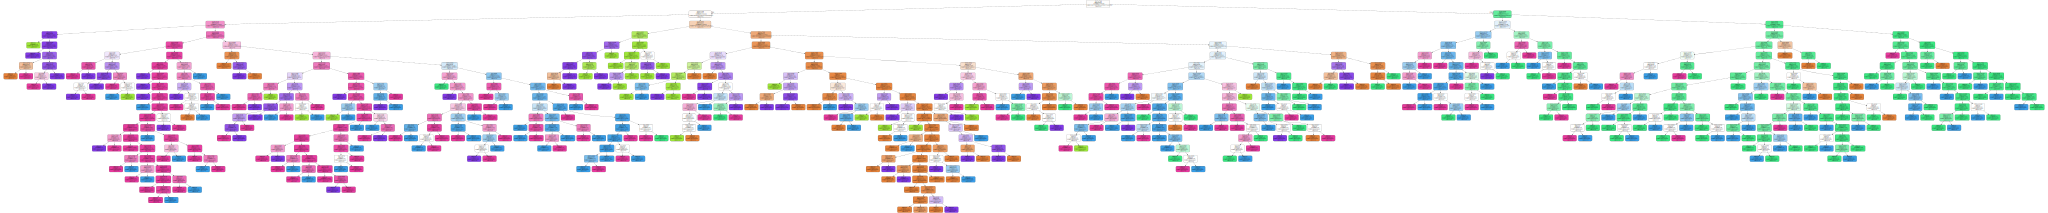

In [21]:
clases=['1',"2","3","4","5","6"]
dot1_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names[0:36],
                                class_names=clases,filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot1_data)  
graph 

### V. Applying Decision trees to a dataset (adult) containing missing values (using h2o)

In [22]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=1,mtries=14,max_depth=3,sample_rate=1)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C15']).sum()/float(len(datos))
model.model_performance(datos)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
0.844599367341

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.113395901928
RMSE: 0.336743080001
LogLoss: 0.355940514915
Mean Per-Class Error: 0.21962523046
AUC: 0.862185303353
Gini: 0.724370606706
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.674480557442: 


,<=50K,>50K,Error,Rate
<=50K,23477.0,1243.0,0.0503,(1243.0/24720.0)
>50K,3817.0,4024.0,0.4868,(3817.0/7841.0)
Total,27294.0,5267.0,0.1554,(5060.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6744806,0.6139762,3.0
max f2,0.2000000,0.7502745,5.0
max f0point5,0.6744806,0.6959770,3.0
max accuracy,0.6744806,0.8445994,3.0
max precision,0.9955752,0.9955752,0.0
max recall,0.0255771,1.0,7.0
max specificity,0.9955752,0.9998786,0.0
max absolute_mcc,0.6744806,0.5375236,3.0
max min_per_class_accuracy,0.3001937,0.6720874,4.0
max mean_per_class_accuracy,0.3001937,0.7803748,4.0


Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0208225,0.9955752,4.1342845,4.1342845,0.9955752,0.9955752,0.9955752,0.9955752,0.0860860,0.0860860,313.4284502,313.4284502
,2,0.0368539,0.9808429,4.0731062,4.1076720,0.9808429,0.9808429,0.9891667,0.9891667,0.0652978,0.1513838,307.3106243,310.7671959
,3,0.0464666,0.9744409,4.0465208,4.0950214,0.9744409,0.9744409,0.9861203,0.9861203,0.0388981,0.1902819,304.6520848,309.5021399
,4,0.1617579,0.6744806,2.8008878,3.1726410,0.6744806,0.6744806,0.7640023,0.7640023,0.3229180,0.5131998,180.0887810,217.2641013
,5,0.4629465,0.3001937,1.2466023,1.9195787,0.3001937,0.3001937,0.4622529,0.4622529,0.3754623,0.8886622,24.6602263,91.9578652
,6,0.5689322,0.1488683,0.6185067,1.6772035,0.1489423,0.1489423,0.4038866,0.4038866,0.0655529,0.9542150,-38.1493255,67.7203529
,7,1.0,0.0255771,0.1062129,1.0,0.0255771,0.0255771,0.2408096,0.2408095,0.0457850,1.0,-89.3787075,0.0
